A solution for: https://www.kaggle.com/datasets/nirmalsankalana/apple-leaf-disease-dataset

In [101]:
#Importing needed modules.
from os import mkdir , listdir
from random import sample , seed
from shutil import rmtree , copyfile
from skimage.io import imread_collection , imshow_collection
from matplotlib.pyplot import plot , xlabel , ylabel , show , title , legend
from tensorflow.keras import layers , Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.applications import InceptionV3
#Instancing from 'ImageDataGenerator' object.
generator_tr = ImageDataGenerator(rescale=1/255,rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
generator =  ImageDataGenerator(rescale=1/255)

healthy  Photos


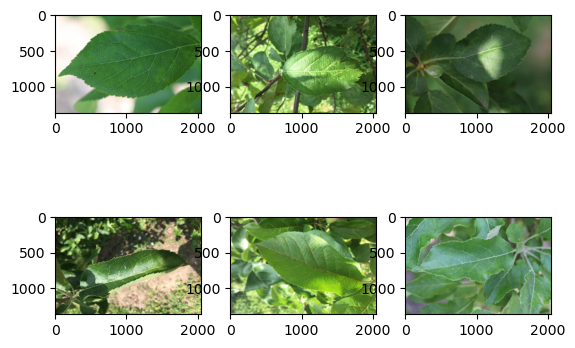


----------------------------------------------------------------------
rust  Photos


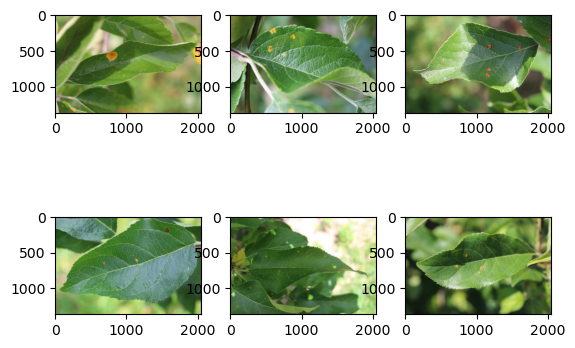


----------------------------------------------------------------------
scab  Photos


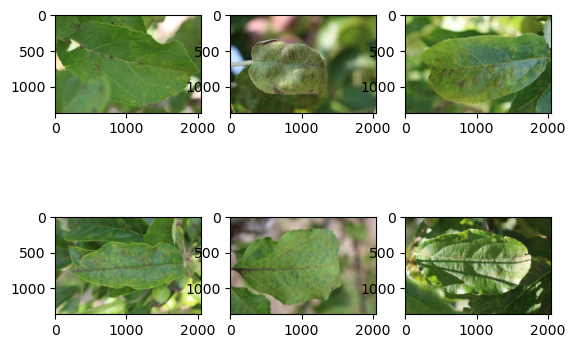


----------------------------------------------------------------------


In [53]:
#Choosing six imgage from each class randomly in order to display them.
photos = list()
for folder in listdir("D:\\datasets\\Apple_diseases\\data") :
    lst = [f'D:\\datasets\\Apple_diseases\\data\\{folder}\\{pic}' for pic in sample(listdir(f'D:\\datasets\\Apple_diseases\\data\\{folder}'),6)]
    photos.append(lst)
idx = 0
for folder in listdir("D:\\datasets\\Apple_diseases\\data") :
    print(folder,' Photos')
    pics = imread_collection(photos[idx])
    imshow_collection(pics)
    idx += 1
    show()
    print('\n----------------------------------------------------------------------')

In [54]:
#Making basic directories.
def Make_dirs(base_path,labels)->tuple:
    '''function docstring'''
    if 'ready_to_gen' in listdir(base_path):
        rmtree(f'{base_path}\\ready_to_gen')
    mkdir(f'{base_path}\\ready_to_gen')
    mkdir(f'{base_path}\\ready_to_gen\\train')
    mkdir(f'{base_path}\\ready_to_gen\\valid')
    for label in labels:
        mkdir(f'{base_path}\\ready_to_gen\\train\\{label}')
        mkdir(f'{base_path}\\ready_to_gen\\valid\\{label}')
    return f'{base_path}\\ready_to_gen\\train' , f'{base_path}\\ready_to_gen\\valid'

In [55]:
train_path , valid_path = Make_dirs("D:\\datasets\\Apple_diseases",
                                    listdir("D:\\datasets\\Apple_diseases\\data"))
def Split_data(base_path,train_dir,valid_dir,train_size)->None:
    '''function docstring'''
    for folder in listdir(base_path):
        size = (train_size*len(listdir(f'{base_path}\\{folder}')))//100
        seed(1)
        selected = sample(listdir(f'{base_path}\\{folder}'),size)
        for photo in listdir(f'{base_path}\\{folder}'):
            try:
                test = load_img(f'{base_path}\\{folder}\\{photo}')
                if photo in selected:
                    copyfile(f'{base_path}\\{folder}\\{photo}',f'{train_dir}\\{folder}\\{photo}')
                else :
                    copyfile(f'{base_path}\\{folder}\\{photo}',f'{valid_dir}\\{folder}\\{photo}')
            except :
                print('Zero found, So ignoring...')

In [56]:
Split_data("D:\\datasets\\Apple_diseases\\data",train_path,valid_path,75)

In [57]:
#Generating photos.
ready_train = generator_tr.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              batch_size=13)
ready_valid = generator.flow_from_directory(valid_path,
                                              target_size=(150,150),
                                              batch_size=8)

Found 1297 images belonging to 3 classes.
Found 433 images belonging to 3 classes.


In [68]:
def Create_model()->None:
    '''Function docstring'''
    pre = InceptionV3(include_top=False,input_shape=(150,150,3))
    for layer in pre.layers:
        layer.trainable = False
    last_layer = pre.get_layer('mixed7')
    out = last_layer.output
    x = layers.Flatten()(out)
    #x = layers.Dense(512,activation='relu')(x)
    x = layers.Dense(3,activation='softmax')(x)
    model = Model(pre.input,x)
    model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [71]:
#Data train.
history = Create_model().fit(ready_train,epochs=15,validation_data=ready_valid)

Epoch 1/15
100/100 [==============================] - 125s 1s/step - loss: 0.9257 - accuracy: 0.5790 - val_loss: 0.7433 - val_accuracy: 0.6605
Epoch 2/15
100/100 [==============================] - 114s 1s/step - loss: 0.7165 - accuracy: 0.7163 - val_loss: 0.5989 - val_accuracy: 0.7875
Epoch 3/15
100/100 [==============================] - 72s 722ms/step - loss: 0.6240 - accuracy: 0.7502 - val_loss: 0.5344 - val_accuracy: 0.8037
Epoch 4/15
100/100 [==============================] - 87s 874ms/step - loss: 0.5450 - accuracy: 0.7995 - val_loss: 0.5222 - val_accuracy: 0.8199
Epoch 5/15
100/100 [==============================] - 79s 790ms/step - loss: 0.5256 - accuracy: 0.7995 - val_loss: 0.4869 - val_accuracy: 0.8083
Epoch 6/15
100/100 [==============================] - 78s 779ms/step - loss: 0.4901 - accuracy: 0.8142 - val_loss: 0.4673 - val_accuracy: 0.8245
Epoch 7/15
100/100 [==============================] - 85s 853ms/step - loss: 0.4862 - accuracy: 0.8219 - val_loss: 0.4692 - val_accura

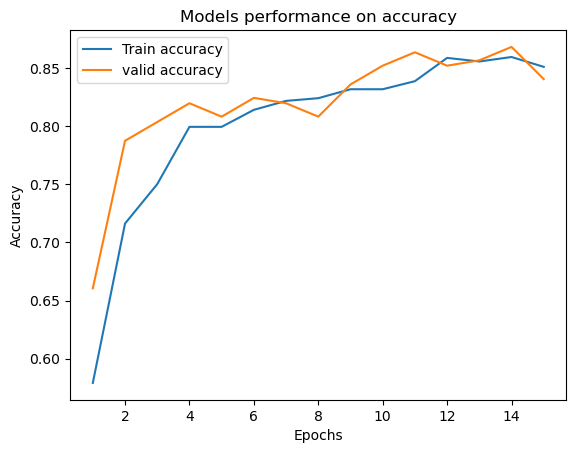

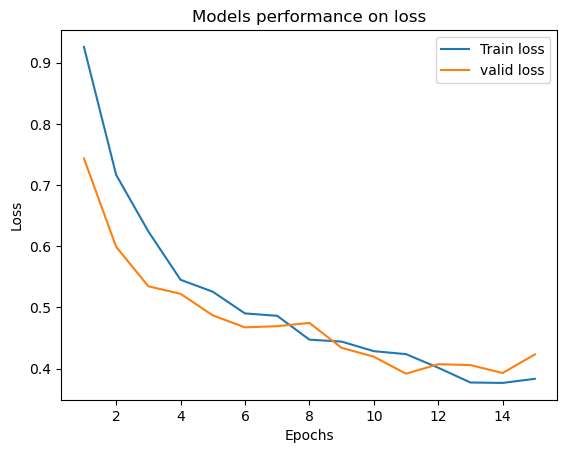

In [72]:
Epoch = len(history.epoch)+1
plot(range(1,Epoch),history.history['accuracy'])
plot(range(1,Epoch),history.history['val_accuracy'])
xlabel('Epochs')
ylabel('Accuracy')
title('Models performance on accuracy')
legend(['Train accuracy','valid accuracy'])
show()
plot(range(1,Epoch),history.history['loss'])
plot(range(1,Epoch),history.history['val_loss'])
xlabel('Epochs')
ylabel('Loss')
title('Models performance on loss')
legend(['Train loss','valid loss'])
show()

End